In [40]:
import pandas as pd
import numpy as np

In [41]:
import warnings
 
# 屏蔽某个特定警告类型
warnings.filterwarnings('ignore', category=UserWarning)
 
# 屏蔽所有警告
warnings.filterwarnings('ignore')

In [42]:
# import tushare as ts
# ts.set_token('57b81c613f14d6d45c832968542884a0fe97b8e2fcda6f1fc67d17c3')
# pro = ts.pro_api()

In [43]:
trade_cal = pd.read_csv("trade_cal.csv")
trade_cal

,exchange,cal_date,is_open,pretrade_date
0,SSE,20141027,1,20141024
1,SSE,20141028,1,20141027
2,SSE,20141029,1,20141028
3,SSE,20141030,1,20141029
4,SSE,20141031,1,20141030
...,...,...,...,...
2427,SSE,20241021,1,20241018
2428,SSE,20241022,1,20241021
2429,SSE,20241023,1,20241022
2430,SSE,20241024,1,20241023


In [44]:
custom_date = pd.read_csv("custom_date.csv")
start_date=str(custom_date.start_date[0])
end_date=str(custom_date.end_date[0])
print(start_date)
print(end_date)

20141027
20241027


In [45]:
# df = pro.index_daily(ts_code='399905.SZ', start_date=start_date, end_date=end_date)
# df

In [46]:
# eval_factor_name = "vol_w_downshadow_std_1M"
# eval_factor_name = "total_mv"
# eval_factor_name = "mmt_intraday_M"
# eval_factor_name = "liq_amihud_avg_1M"
eval_factor_name = "corr_ret_turn_post_1M"

In [47]:
# df = pd.read_csv("backtest_小市值.csv")
# df = pd.read_csv("backtest_小市值_行业中性化.csv")
# df = pd.read_csv("backtest_total_mv.csv")
df = pd.read_csv("backtest_"+eval_factor_name+".csv")
df

,group01,group02,group03,group04,group05,group06,group07,group08,group09,group10,corr_spearman,zz500_future_5,current_date
0,0.021880,0.020155,0.023071,0.020851,0.021560,0.018389,0.023946,0.024607,0.020942,0.024775,0.017378,0.156339,20141124
1,0.010294,0.009751,0.026808,0.016887,0.020309,0.024903,0.025327,0.016966,0.011882,0.005835,-0.012269,-0.003660,20141201
2,0.025665,0.028467,0.030598,0.034824,0.022481,0.032118,0.033000,0.035710,0.024504,0.021733,0.004723,-0.014659,20141208
3,-0.092538,-0.088693,-0.084051,-0.072774,-0.068564,-0.077479,-0.073511,-0.049787,-0.052287,-0.040307,0.190836,0.018239,20141215
4,0.006693,0.001072,0.009564,0.008835,0.004004,0.003978,0.008192,0.016870,0.010196,0.018511,0.067163,-0.018991,20141222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,-0.002731,-0.000389,-0.001299,-0.004805,-0.005933,0.000619,-0.002887,-0.000756,-0.000820,-0.004358,0.019357,-0.015585,20240910
478,0.081373,0.086786,0.084472,0.086883,0.086631,0.087443,0.082335,0.083395,0.079588,0.075240,-0.041780,0.017085,20240919
479,0.135171,0.141955,0.142239,0.137014,0.135064,0.133610,0.128786,0.125777,0.134817,0.119065,-0.063481,0.044558,20240926
480,-0.011903,-0.023898,-0.021790,-0.018373,-0.032732,-0.021055,-0.020513,-0.023973,-0.022319,-0.019332,-0.065830,0.017653,20241010


In [48]:
df.index= pd.to_datetime(df.current_date.tolist(),format="%Y%m%d")
df["group01_cumsum"]=df.group01.cumsum()
df["group02_cumsum"]=df.group02.cumsum()
df["group03_cumsum"]=df.group03.cumsum()
df["group04_cumsum"]=df.group04.cumsum()
df["group05_cumsum"]=df.group05.cumsum()
df["group06_cumsum"]=df.group06.cumsum()
df["group07_cumsum"]=df.group07.cumsum()
df["group08_cumsum"]=df.group08.cumsum()
df["group09_cumsum"]=df.group09.cumsum()
df["group10_cumsum"]=df.group10.cumsum()
df["zz500_cumsum"]=df.zz500_future_5.cumsum()
df

,group01,group02,group03,group04,group05,group06,group07,group08,group09,group10,...,group02_cumsum,group03_cumsum,group04_cumsum,group05_cumsum,group06_cumsum,group07_cumsum,group08_cumsum,group09_cumsum,group10_cumsum,zz500_cumsum
2014-11-24,0.021880,0.020155,0.023071,0.020851,0.021560,0.018389,0.023946,0.024607,0.020942,0.024775,...,0.020155,0.023071,0.020851,0.021560,0.018389,0.023946,0.024607,0.020942,0.024775,0.156339
2014-12-01,0.010294,0.009751,0.026808,0.016887,0.020309,0.024903,0.025327,0.016966,0.011882,0.005835,...,0.029906,0.049879,0.037738,0.041869,0.043292,0.049274,0.041573,0.032824,0.030610,0.152679
2014-12-08,0.025665,0.028467,0.030598,0.034824,0.022481,0.032118,0.033000,0.035710,0.024504,0.021733,...,0.058373,0.080477,0.072562,0.064349,0.075410,0.082274,0.077282,0.057328,0.052343,0.138020
2014-12-15,-0.092538,-0.088693,-0.084051,-0.072774,-0.068564,-0.077479,-0.073511,-0.049787,-0.052287,-0.040307,...,-0.030320,-0.003575,-0.000212,-0.004215,-0.002068,0.008763,0.027495,0.005040,0.012036,0.156259
2014-12-22,0.006693,0.001072,0.009564,0.008835,0.004004,0.003978,0.008192,0.016870,0.010196,0.018511,...,-0.029248,0.005989,0.008623,-0.000212,0.001910,0.016955,0.044365,0.015237,0.030546,0.137268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-10,-0.002731,-0.000389,-0.001299,-0.004805,-0.005933,0.000619,-0.002887,-0.000756,-0.000820,-0.004358,...,-0.363314,-0.219382,-0.080801,-0.002107,0.148892,0.220469,0.336450,0.434070,0.369456,0.330362
2024-09-19,0.081373,0.086786,0.084472,0.086883,0.086631,0.087443,0.082335,0.083395,0.079588,0.075240,...,-0.276528,-0.134910,0.006082,0.084524,0.236335,0.302804,0.419846,0.513659,0.444696,0.347447
2024-09-26,0.135171,0.141955,0.142239,0.137014,0.135064,0.133610,0.128786,0.125777,0.134817,0.119065,...,-0.134573,0.007329,0.143095,0.219588,0.369946,0.431590,0.545622,0.648475,0.563760,0.392006
2024-10-10,-0.011903,-0.023898,-0.021790,-0.018373,-0.032732,-0.021055,-0.020513,-0.023973,-0.022319,-0.019332,...,-0.158472,-0.014461,0.124722,0.186856,0.348891,0.411077,0.521649,0.626156,0.544428,0.409658


In [49]:
import matplotlib.pyplot as plt

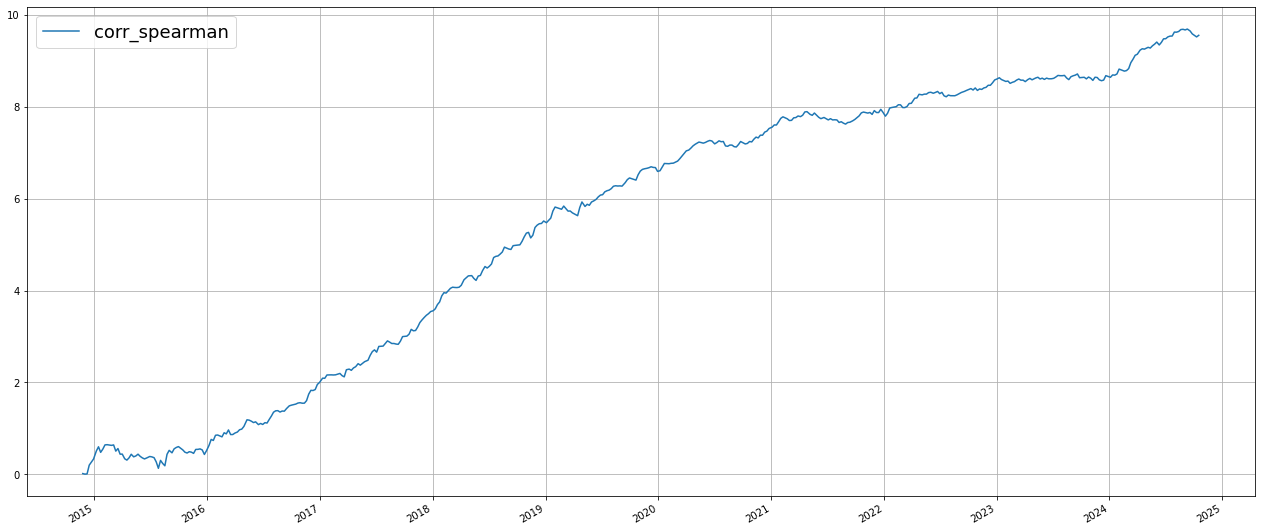

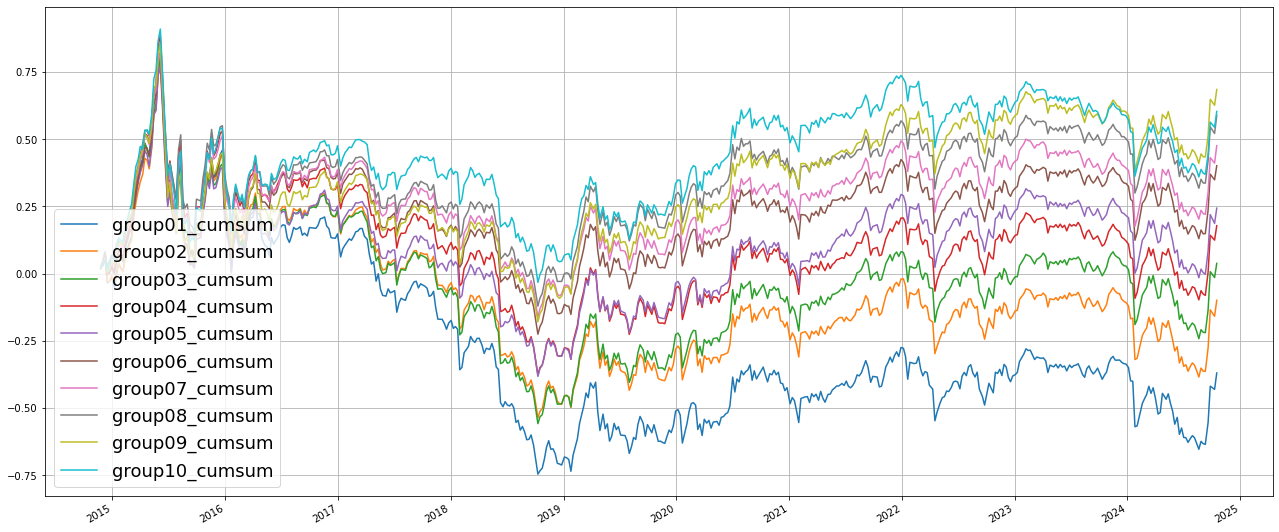

In [50]:
ax1 = df.corr_spearman.cumsum().plot(figsize=(22,10),grid=True)
ax1.legend(fontsize = 18)
ax2 = df[["group01_cumsum",
    "group02_cumsum",
    "group03_cumsum",
    "group04_cumsum",
    "group05_cumsum",
    "group06_cumsum",
    "group07_cumsum",
    "group08_cumsum",
    "group09_cumsum",
    "group10_cumsum",]].plot(figsize=(22,10),grid=True)
ax2.legend(fontsize = 18)

In [58]:
# df["strategy_cumsum"]=df.group01_cumsum
# df["return_mean_stock"]=df.group01
df["strategy_cumsum"]=df.group10_cumsum
df["return_mean_stock"]=df.group10

In [59]:
i = np.argmax((np.maximum.accumulate(df.strategy_cumsum) - df.strategy_cumsum))# 最大回撤结束的位置 最低的那个位置
j = np.argmax(df.strategy_cumsum[:i])# 回撤开始的位置 最高的那个点
maxdrawdown = df.strategy_cumsum[j] - df.strategy_cumsum[i] # 最大回撤

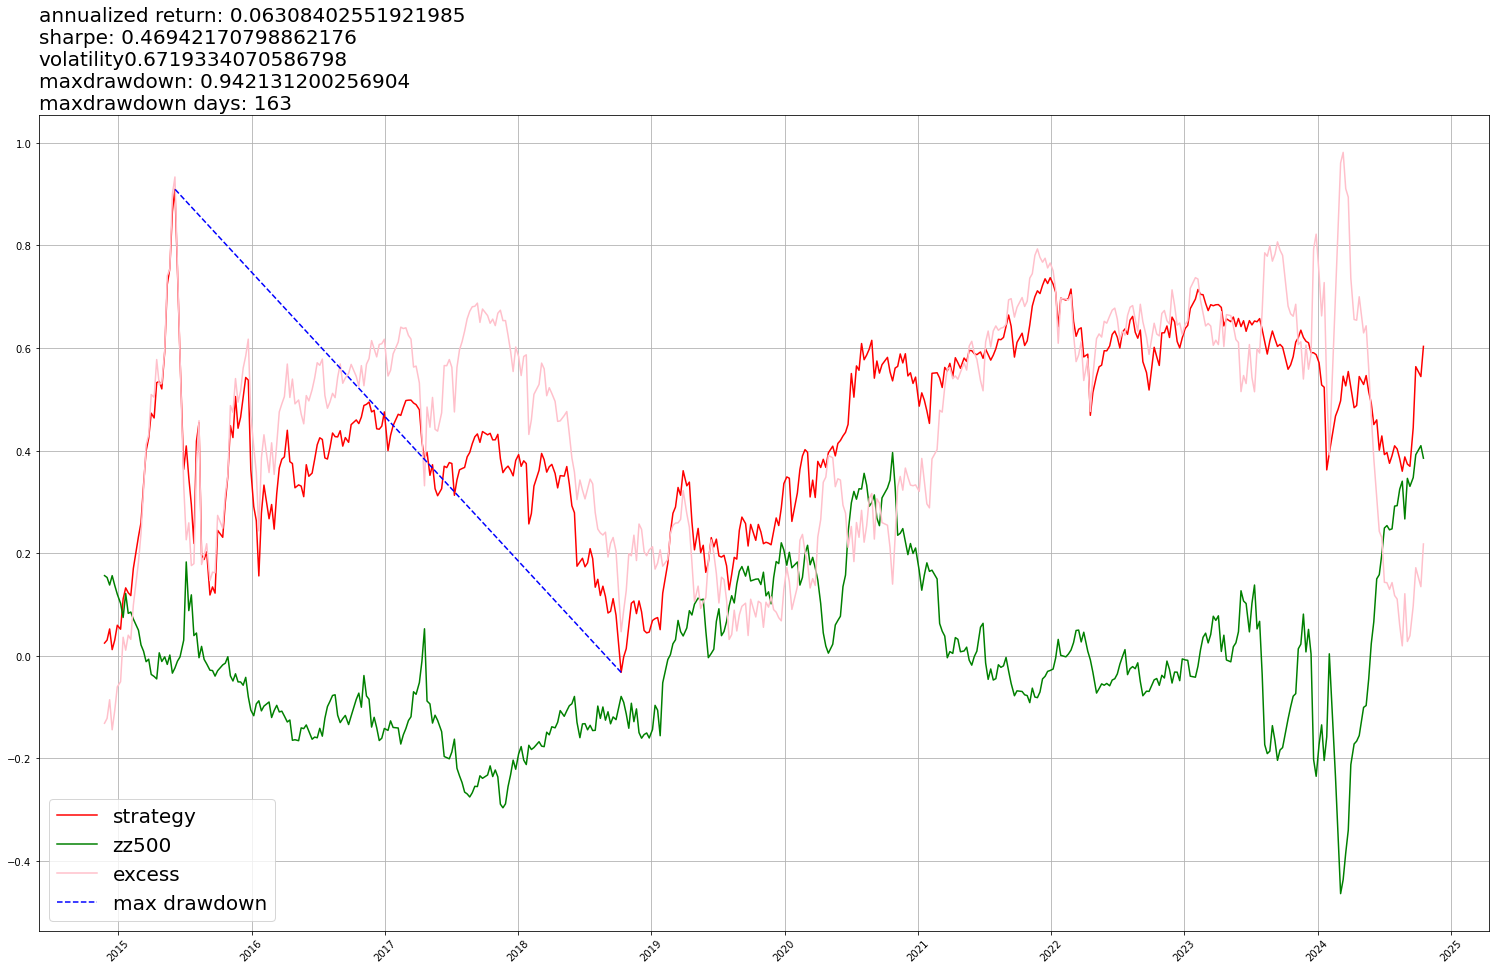

In [60]:
str1 = "annualized return: "+ str(df.strategy_cumsum[-1]/(df.shape[0]*5)*252)+"\n"
str2 = "sharpe: "+ str(df.return_mean_stock.mean()/df.return_mean_stock.std()*np.sqrt(252))+"\n"
str3 = "volatility" + str(df.return_mean_stock.std()*np.sqrt(252))+"\n"
str4 = "maxdrawdown: " + str(maxdrawdown)+"\n"
str5 = "maxdrawdown days: "+str(i-j)

plt.figure(figsize=(26,15))
# 策略
plt.plot(df.index, df.strategy_cumsum, label='strategy', color='red')
# 中证500
plt.plot(df.index, df.zz500_cumsum, label='zz500', color='green')
# 超额
plt.plot(df.index, df.strategy_cumsum - df.zz500_cumsum,label='excess', color='pink')
#最大回撤
plt.plot([df.index[i], df.index[j]], [df.strategy_cumsum[i], df.strategy_cumsum[j]], linestyle='--', label="max drawdown",color='blue')
plt.legend(fontsize=20)
plt.xticks(rotation=45)
plt.grid(True)
plt.title(str1+str2+str3+str4+str5,fontsize=20,loc='left', ha='left')
plt.savefig("factor_pool/"+eval_factor_name+"_3.png", dpi =300)

In [61]:
ax1.figure.savefig("factor_pool/"+eval_factor_name+"_1.png", dpi =300)
ax2.figure.savefig("factor_pool/"+eval_factor_name+"_2.png", dpi =300)